In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

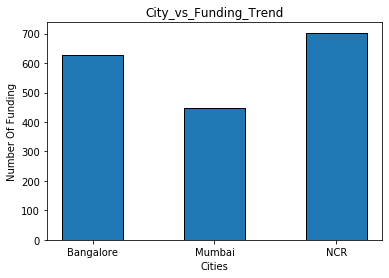

In [13]:
with open("startup_funding.csv",encoding="ISO-8859-1") as fileObj:
    fileData=csv.DictReader(fileObj,skipinitialspace=True)
    reqDataSet=[]
    for row in fileData:
        if row["CityLocation"]!="":
            if row["CityLocation"]=="Bangalore":
                reqDataSet.append(row)
            elif row["CityLocation"]=="bangalore":
                row["CityLocation"]="Bangalore"
                reqDataSet.append(row)
            elif row["CityLocation"]=="New Delhi":
                reqDataSet.append(row)
            elif row["CityLocation"]=="Delhi":
                row["CityLocation"]="New Delhi"
                reqDataSet.append(row)
            elif row["CityLocation"]=="Mumbai" or row["CityLocation"]=="Gurgaon" or row["CityLocation"]=="Noida":
                reqDataSet.append(row)
city_vs_funding={}
for row in reqDataSet:
    city_vs_funding[row["CityLocation"]]=city_vs_funding.get(row["CityLocation"],0)+1
fundingInNCR=0
for city in city_vs_funding:
    if city=="New Delhi":
        fundingInNCR=fundingInNCR+city_vs_funding[city]
    elif city=="Noida":
        fundingInNCR=fundingInNCR+city_vs_funding[city]
    elif city=="Gurgaon":
        fundingInNCR=fundingInNCR+city_vs_funding[city]
city_vs_funding["NCR"]=fundingInNCR
del city_vs_funding["New Delhi"]
del city_vs_funding["Noida"]
del city_vs_funding["Gurgaon"]
city=[key for key in city_vs_funding]
funding=[city_vs_funding[key] for key in city_vs_funding]
plt.bar(city,funding,edgecolor="black",width=0.5)
plt.xlabel("Cities")
plt.ylabel("Number Of Funding")
plt.title("City_vs_Funding_Trend")
plt.show()

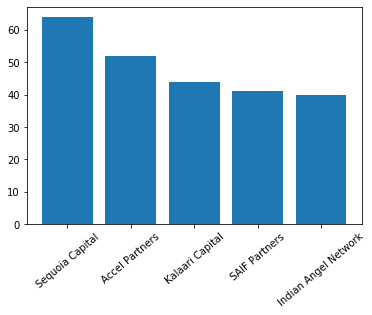

In [29]:
with open("startup_funding.csv",encoding="ISO-8859-1") as fileObj:
    fileData=csv.DictReader(fileObj,skipinitialspace=True)
    investors=[]
    investor_vs_company=[]
    for row in fileData:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            startup=row["StartupName"]
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
                investor_vs_company.append([i.strip(),startup])
dic=dict()
for i in investors:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_y=np_y[::-1]
np_x=np_x[::-1]
topInvestors=[]
investmentFrequency=[]
length=0
i=0
j=0
while length<5:
    if (np_x[i]!=""):
        topInvestors.append(np_x[i])
        investmentFrequency.append(np_y[j])
        length+=1
    j+=1
    i+=1
plt.bar(topInvestors,investmentFrequency)
plt.xticks(rotation=40)
plt.show()
    

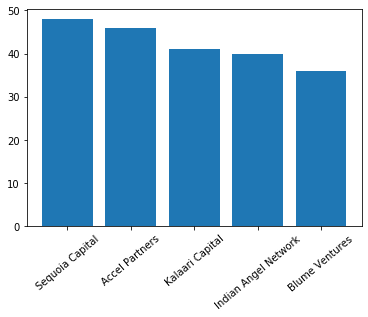

In [42]:
import pandas as pd
import numpy as np
data=pd.read_csv("startup_funding.csv",encoding='ISO-8859-1')
df=data.copy()
np_investors=np.array(investor_vs_company)
for i in range(len(np_investors)):
    if 'Ola' in np_investors[i][1]:
        np_investors[i][1]='Ola'
    if 'Flipkart' in np_investors[i][1]:
        np_investors[i][1]='Flipkart'
    if 'Oyo' in np_investors[i][1] or 'OYO Rooms' in np_investors[i][1]:
        np_investors[i][1]='Oyo'
    if 'Paytm' in np_investors[i][1]:
        np_investors[i][1]='Paytm'
topUniqueInvestors={}
for entry in np_investors:
    if entry[0] in topUniqueInvestors:
        if entry[1] not in topUniqueInvestors[entry[0]]:
            topUniqueInvestors[entry[0]].append(entry[1])
    else:
        topUniqueInvestors[entry[0]]=[entry[1]]
topInvestors={}
for key in topUniqueInvestors:
    topInvestors[key]=len(topUniqueInvestors[key])
x=[]
y=[]
for i in topInvestors.keys():
    x.append(i)
    y.append(topInvestors[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_y=np_y[::-1]
np_x=np_x[::-1]
topInvestors=[]
investmentFrequency=[]
length=0
i=0
j=0
while length<5:
    if (np_x[i]!=""):
        topInvestors.append(np_x[i])
        investmentFrequency.append(np_y[j])
        length+=1
    j+=1
    i+=1
plt.bar(topInvestors,investmentFrequency)
plt.xticks(rotation=40)
plt.show()

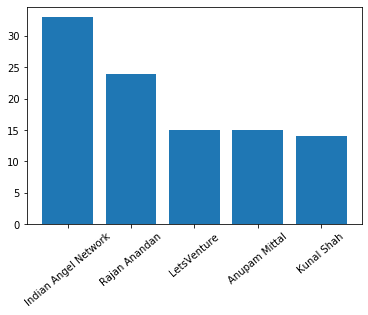

In [60]:
with open("startup_funding.csv",encoding="ISO-8859-1") as fileObj:
    fileData=csv.DictReader(fileObj,skipinitialspace=True)
    investor_vs_fundingType=[]
    np_investors=np.array(investor_vs_company)
    for i in range(len(np_investors)):
        if 'Ola' in np_investors[i][1]:
            np_investors[i][1]='Ola'
        if 'Flipkart' in np_investors[i][1]:
            np_investors[i][1]='Flipkart'
        if 'Oyo' in np_investors[i][1] or 'OYO Rooms' in np_investors[i][1]:
            np_investors[i][1]='Oyo'
        if 'Paytm' in np_investors[i][1]:
            np_investors[i][1]='Paytm'
    for idx,row in enumerate(fileData):
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            fundingType=row["InvestmentType"]
            if fundingType=="Seed Funding" or fundingType=="Crowd Funding":
                for i in row['InvestorsName'].split(','):
                    investor_vs_fundingType.append([i.strip(),fundingType,np_investors[idx][1]])
np_investor=np.array(investor_vs_fundingType)
topSeedAndCrowdFunders={}
for entry in np_investor:
    if entry[0] in topSeedAndCrowdFunders:
        if entry[2] not in topSeedAndCrowdFunders[entry[0]]:
            topSeedAndCrowdFunders[entry[0]].append(entry[2])
    else:
        topSeedAndCrowdFunders[entry[0]]=[entry[2]]
topInvestors={}
for key in topSeedAndCrowdFunders:
    topInvestors[key]=len(topSeedAndCrowdFunders[key])
x=[]
y=[]
for i in topInvestors.keys():
    x.append(i)
    y.append(topInvestors[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_y=np_y[::-1]
np_x=np_x[::-1]
topInvestors=[]
investmentFrequency=[]
length=0
i=0
j=0
while length<5:
    if (np_x[i]!=""):
        topInvestors.append(np_x[i])
        investmentFrequency.append(np_y[j])
        length+=1
    j+=1
    i+=1
plt.bar(topInvestors,investmentFrequency)
plt.xticks(rotation=40)
plt.show()

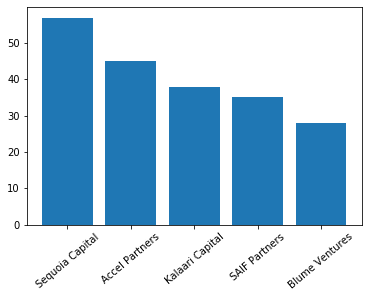

In [61]:
with open("startup_funding.csv",encoding="ISO-8859-1") as fileObj:
    fileData=csv.DictReader(fileObj,skipinitialspace=True)
    investor_vs_fundingType=[]
    np_investors=np.array(investor_vs_company)
    for i in range(len(np_investors)):
        if 'Ola' in np_investors[i][1]:
            np_investors[i][1]='Ola'
        if 'Flipkart' in np_investors[i][1]:
            np_investors[i][1]='Flipkart'
        if 'Oyo' in np_investors[i][1] or 'OYO Rooms' in np_investors[i][1]:
            np_investors[i][1]='Oyo'
        if 'Paytm' in np_investors[i][1]:
            np_investors[i][1]='Paytm'
    for idx,row in enumerate(fileData):
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            fundingType=row["InvestmentType"]
            if fundingType=="Private Equity":
                for i in row['InvestorsName'].split(','):
                    investor_vs_fundingType.append([i.strip(),fundingType,np_investors[idx][1]])
np_investor=np.array(investor_vs_fundingType)
topSeedAndCrowdFunders={}
for entry in np_investor:
    if entry[0] in topSeedAndCrowdFunders:
        if entry[2] not in topSeedAndCrowdFunders[entry[0]]:
            topSeedAndCrowdFunders[entry[0]].append(entry[2])
    else:
        topSeedAndCrowdFunders[entry[0]]=[entry[2]]
topInvestors={}
for key in topSeedAndCrowdFunders:
    topInvestors[key]=len(topSeedAndCrowdFunders[key])
x=[]
y=[]
for i in topInvestors.keys():
    x.append(i)
    y.append(topInvestors[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)

np_y=np_y[::-1]
np_x=np_x[::-1]
topInvestors=[]
investmentFrequency=[]
length=0
i=0
j=0
while length<5:
    if (np_x[i]!=""):
        topInvestors.append(np_x[i])
        investmentFrequency.append(np_y[j])
        length+=1
    j+=1
    i+=1
plt.bar(topInvestors,investmentFrequency)
plt.xticks(rotation=40)
plt.show()